In [1]:
#importing required libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings

warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
food = pd.read_csv('train_food.csv')

In [4]:
food_raw = food.copy()

In [5]:
food_raw.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [6]:
food_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 31.3 MB


In [7]:
def display_all(df):
    with pd.option_context("display.max_rows",1000):
        with pd.option_context("display.max_columns",1000):
            display(df)

In [8]:
food_meal = pd.read_csv('meal_info.csv')

In [9]:
food_meal.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [10]:
food_meal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   meal_id   51 non-null     int64 
 1   category  51 non-null     object
 2   cuisine   51 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.3+ KB


In [11]:
food_info = pd.read_csv('fulfilment_center_info.csv')
food_info.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [12]:
pd.concat([food_raw,food_meal], axis = 1,join = 'outer')['meal_id']

,meal_id,meal_id
0,1885,1885.0
1,1993,1993.0
2,2539,2539.0
3,2139,1248.0
4,2631,2631.0
...,...,...
456543,1543,NaN
456544,2304,NaN
456545,2664,NaN
456546,2569,NaN


In [13]:
food_merged = pd.merge(food_raw,food_meal,on= 'meal_id')

In [14]:
food_merged[food_merged['meal_id']== 1885]

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai
1,1040403,1,24,1885,136.83,136.83,0,0,1498,Beverages,Thai
2,1103215,1,11,1885,136.83,136.83,0,0,959,Beverages,Thai
3,1034383,1,83,1885,121.31,120.31,0,1,1025,Beverages,Thai
4,1118999,1,32,1885,114.52,113.52,0,1,445,Beverages,Thai
...,...,...,...,...,...,...,...,...,...,...,...
11087,1375154,145,23,1885,160.11,160.11,0,0,501,Beverages,Thai
11088,1201633,145,86,1885,158.14,159.14,0,0,432,Beverages,Thai
11089,1420447,145,68,1885,119.31,121.31,0,0,337,Beverages,Thai
11090,1017944,145,51,1885,159.14,158.14,0,0,1188,Beverages,Thai


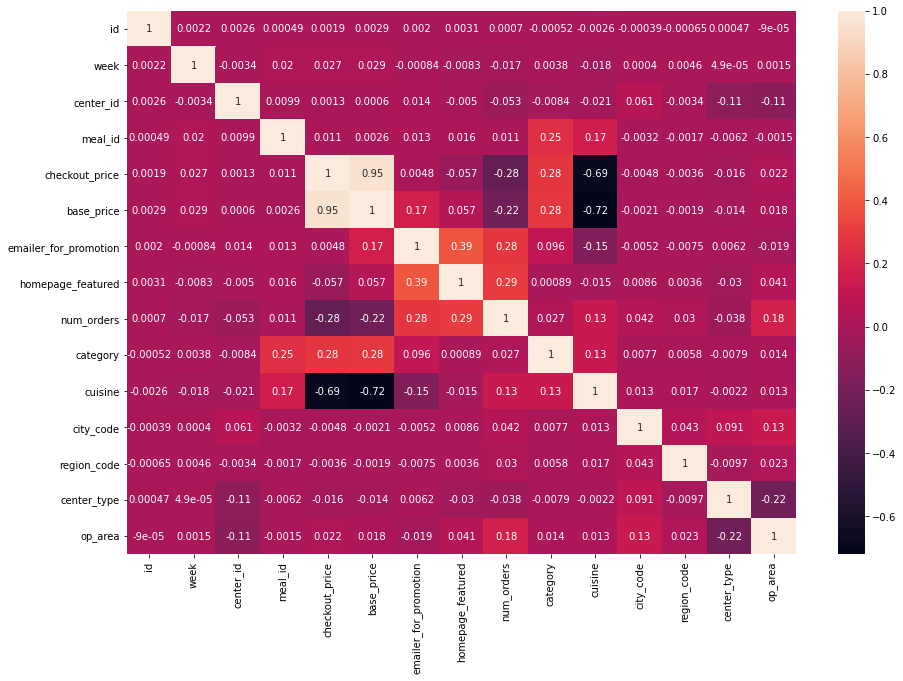

In [115]:
plt.figure(figsize=(15,10))
sns.heatmap(final_food.corr(),annot = True)
plt.show()

In [15]:
final_food = pd.merge(food_merged, food_info, on = 'center_id')

In [16]:
final_food.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456548 entries, 0 to 456547
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
 9   category               456548 non-null  object 
 10  cuisine                456548 non-null  object 
 11  city_code              456548 non-null  int64  
 12  region_code            456548 non-null  int64  
 13  center_type            456548 non-null  object 
 14  op_area                456548 non-nu

[]

<Figure size 720x360 with 0 Axes>

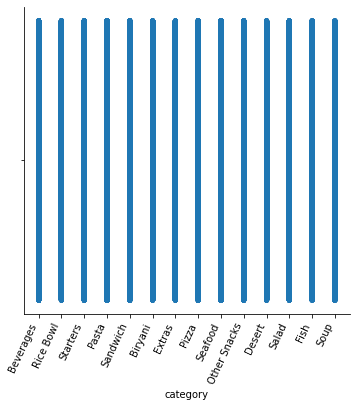

In [17]:
plt.figure(figsize = (10,5))
chart = sns.catplot(x = 'category', data = final_food)
chart.set_xticklabels(rotation=65, horizontalalignment='right')
plt.plot()

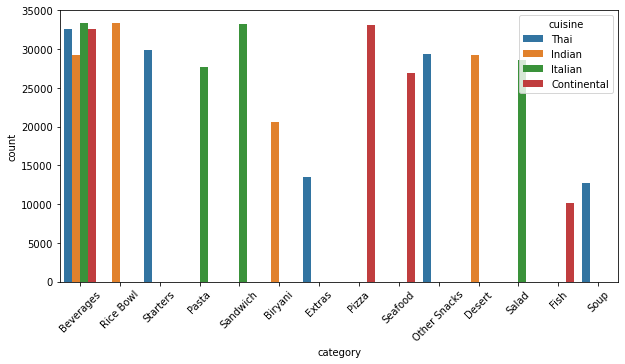

In [18]:
plt.figure(figsize = (10,5))
chart = sns.countplot(x = 'category',hue = 'cuisine', data = final_food)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.show()

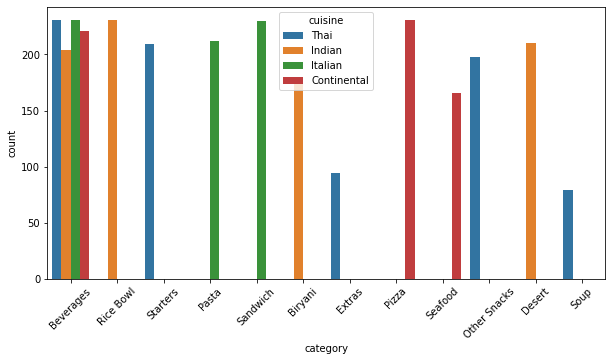

In [19]:
plt.figure(figsize = (10,5))
chart = sns.countplot(x = 'category',hue = 'cuisine', data = final_food[final_food['week']==1])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.show()

In [20]:
final_food.groupby('week').nunique('category')

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
week,,,,,,,,,,,,,,,
1,2922,1,77,45,571,579,2,2,302,12,4,51,8,3,30
2,2896,1,77,45,411,507,2,2,288,12,4,51,8,3,30
3,2899,1,77,45,411,472,2,2,269,12,4,51,8,3,30
4,2889,1,77,45,445,479,1,2,272,12,4,51,8,3,30
5,2859,1,76,45,611,534,2,2,364,12,4,51,8,3,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,3263,1,77,51,704,594,2,2,283,14,4,51,8,3,30
142,3238,1,77,51,654,570,2,2,266,14,4,51,8,3,30
143,3305,1,77,51,590,590,2,2,270,14,4,51,8,3,30


In [21]:
final_food[final_food['week'] == 1]['cuisine'].value_counts()

Indian         820
Thai           811
Italian        673
Continental    618
Name: cuisine, dtype: int64

In [22]:
final_food[final_food['week'] == 2]['cuisine'].value_counts()

Thai           813
Indian         795
Italian        668
Continental    620
Name: cuisine, dtype: int64

In [23]:
final_food['week'].max()

145

In [24]:
final_food[['week','category']].groupby('week').nunique()

,week,category
week,,
1,1,12
2,1,12
3,1,12
4,1,12
5,1,12
...,...,...
141,1,14
142,1,14
143,1,14


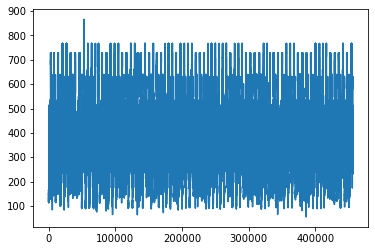

In [25]:
final_food['base_price'].plot()

In [26]:
dic = {}
for i in range(1,146):
    dic[i] = final_food[final_food['week'] == i]['cuisine'].value_counts()

In [27]:
dic[1]

Indian         820
Thai           811
Italian        673
Continental    618
Name: cuisine, dtype: int64

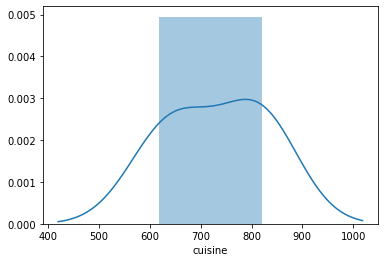

In [28]:
sns.distplot(dic[1])

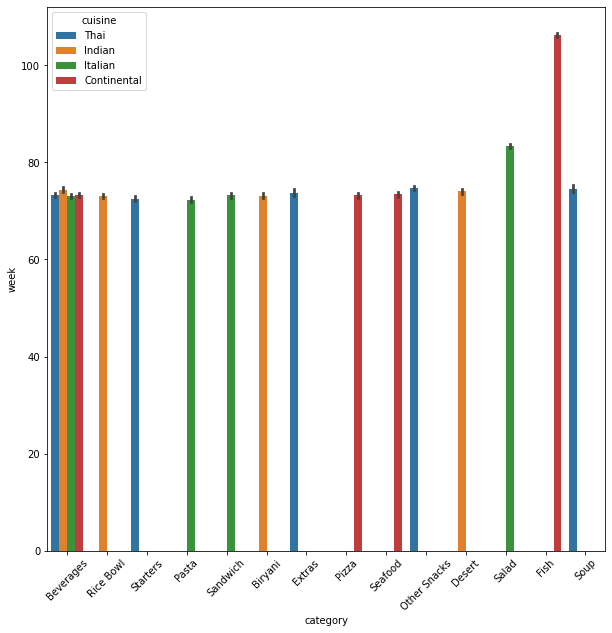

In [29]:
plt.figure(figsize = (10,10))
chart = sns.barplot(x = 'category',y = 'week',hue = 'cuisine' , data = final_food) # it is a blunder
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.show()

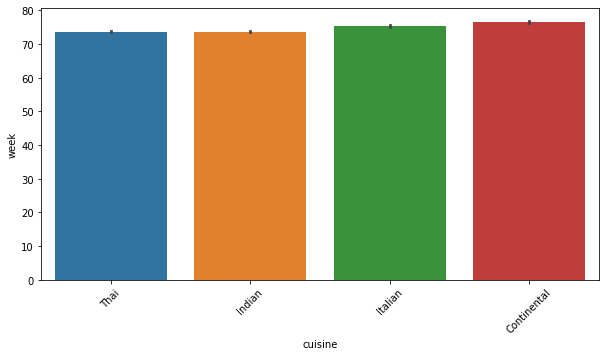

In [30]:
plt.figure(figsize = (10,5))
chart = sns.barplot(x = 'cuisine',y = 'week' , data = final_food)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.show()

In [31]:
final_food

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1018704,2,55,1885,135.83,152.29,0,0,323,Beverages,Thai,647,56,TYPE_C,2.0
2,1196273,3,55,1885,132.92,133.92,0,0,96,Beverages,Thai,647,56,TYPE_C,2.0
3,1116527,4,55,1885,135.86,134.86,0,0,163,Beverages,Thai,647,56,TYPE_C,2.0
4,1343872,5,55,1885,146.50,147.50,0,0,215,Beverages,Thai,647,56,TYPE_C,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,1437396,141,61,2104,583.03,630.53,0,1,13,Fish,Continental,473,77,TYPE_A,4.5
456544,1060716,142,61,2104,581.03,582.03,0,0,42,Fish,Continental,473,77,TYPE_A,4.5
456545,1029231,143,61,2104,583.03,581.03,0,0,40,Fish,Continental,473,77,TYPE_A,4.5
456546,1141147,144,61,2104,582.03,581.03,0,0,53,Fish,Continental,473,77,TYPE_A,4.5


In [32]:
final_food.week.value_counts()

122    3359
105    3348
106    3347
140    3332
123    3331
       ... 
13     2838
12     2831
14     2830
7      2795
8      2786
Name: week, Length: 145, dtype: int64

In [33]:
final_food.city_code.value_counts()

590    54746
526    43525
638    20047
522    13459
517    13109
604    13062
699    12098
647    11833
576    11456
614    11332
676    11177
593    10804
685     6993
700     6891
713     6853
579     6843
679     6801
456     6716
703     6706
698     6434
577     6389
599     6296
596     6293
648     6090
602     6057
659     6053
654     6041
628     5983
651     5975
562     5938
615     5892
556     5885
473     5855
561     5846
461     5763
620     5732
609     5721
675     5715
485     5712
658     5591
553     5547
649     5528
680     5379
683     5296
695     5296
632     5292
702     5264
515     5085
478     5021
693     4627
541     4501
Name: city_code, dtype: int64

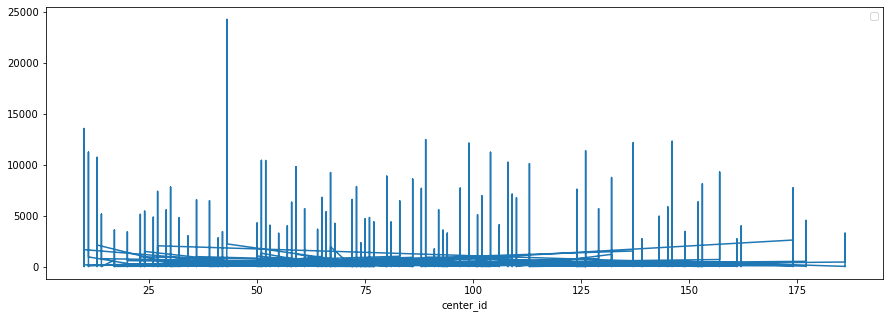

In [34]:
from itertools import cycle

color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])
final_food.set_index('center_id')['num_orders'].T.plot(figsize=(15, 5),
                   color=next(color_cycle))
plt.legend('')
plt.show()

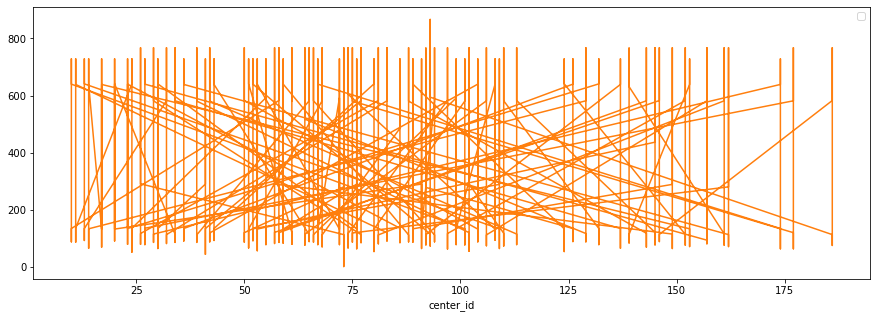

In [35]:
final_food.set_index('center_id')['checkout_price'].T.plot(figsize=(15, 5),
                   color=next(color_cycle))
plt.legend('')
plt.show()

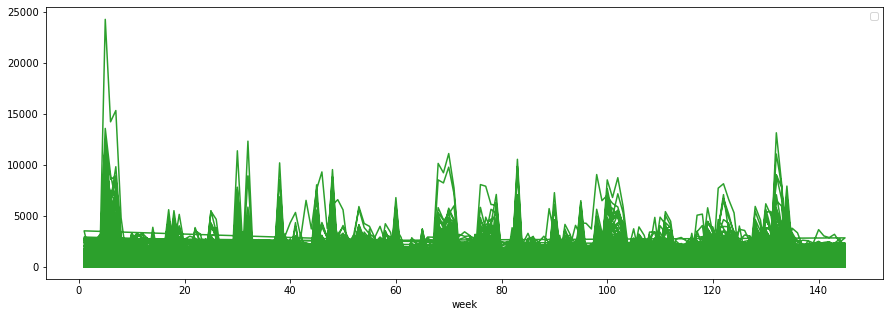

In [36]:
final_food.set_index('week')['num_orders'].T.plot(figsize=(15, 5),
                   color=next(color_cycle))
plt.legend('')
plt.show()

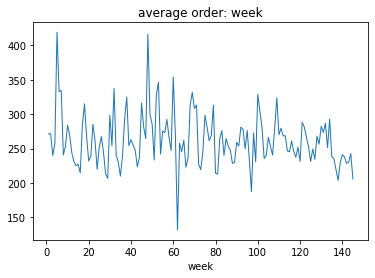

In [37]:
final_food.groupby('week').mean()['num_orders'].plot(kind='line',
              lw=1,
              title='average order: week',
              )
plt.show()

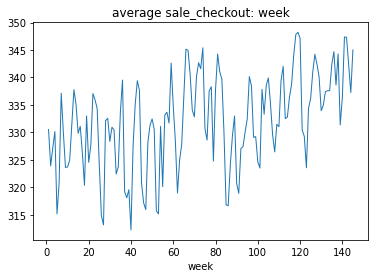

In [38]:
final_food.groupby('week').mean()['checkout_price'].plot(kind='line',
              lw=1,
              title='average sale_checkout: week',
              )
plt.show()

In [39]:
final_food.sample(20,random_state = 42)
final_food.category.value_counts()

Beverages       127890
Rice Bowl        33408
Sandwich         33291
Pizza            33138
Starters         29941
Other Snacks     29379
Desert           29294
Salad            28559
Pasta            27694
Seafood          26916
Biryani          20614
Extras           13562
Soup             12675
Fish             10187
Name: category, dtype: int64

In [40]:
array_d = np.array(dic)
dic

{1: Indian         820
 Thai           811
 Italian        673
 Continental    618
 Name: cuisine, dtype: int64,
 2: Thai           813
 Indian         795
 Italian        668
 Continental    620
 Name: cuisine, dtype: int64,
 3: Thai           812
 Indian         800
 Italian        671
 Continental    616
 Name: cuisine, dtype: int64,
 4: Thai           825
 Indian         789
 Italian        654
 Continental    621
 Name: cuisine, dtype: int64,
 5: Thai           803
 Indian         780
 Italian        645
 Continental    631
 Name: cuisine, dtype: int64,
 6: Thai           803
 Indian         759
 Italian        644
 Continental    640
 Name: cuisine, dtype: int64,
 7: Thai           804
 Indian         733
 Italian        648
 Continental    610
 Name: cuisine, dtype: int64,
 8: Thai           810
 Indian         734
 Italian        662
 Continental    580
 Name: cuisine, dtype: int64,
 9: Thai           806
 Indian         757
 Italian        648
 Continental    643
 Name: cuisin

In [41]:
cate_food = final_food.category.values
week_cuisine = pd.Series(dic)[145]

In [42]:
week_cuisine = pd.DataFrame(dic)


In [43]:
week_cuisine.index

Index(['Continental', 'Indian', 'Italian', 'Thai'], dtype='object')

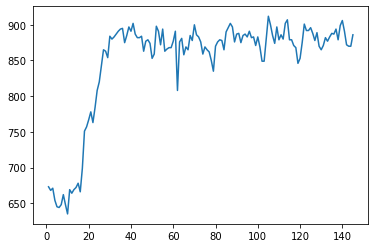

In [44]:
week_cuisine.loc['Italian'].plot(kind = 'line')

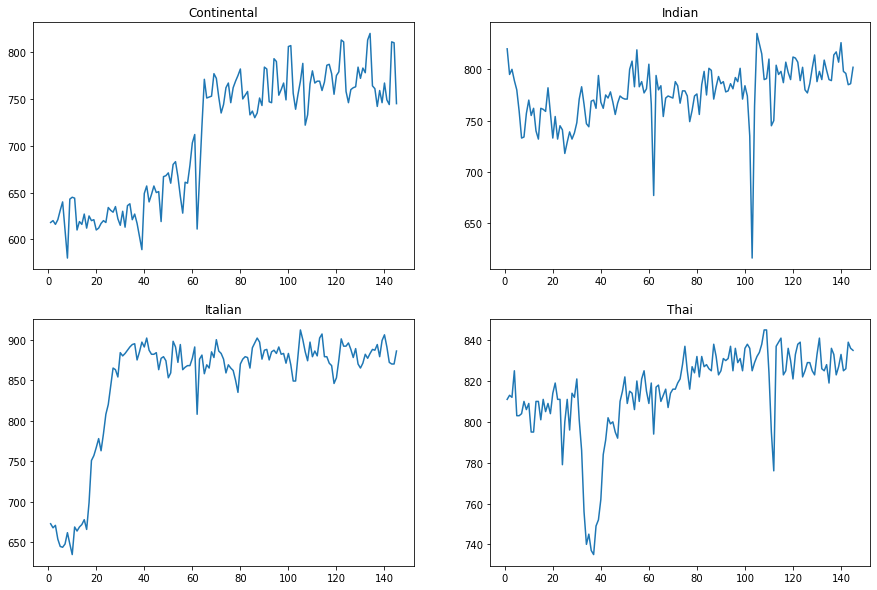

In [45]:
fig,axs = plt.subplots(2,2,figsize = (15,10))
cat = week_cuisine.index
axs[0, 0].plot(week_cuisine.loc[cat[0]])
axs[0, 0].set_title(cat[0])
axs[0, 1].plot(week_cuisine.loc[cat[1]])
axs[0, 1].set_title(cat[1])
axs[1, 0].plot(week_cuisine.loc[cat[2]])
axs[1, 0].set_title(cat[2])
axs[1, 1].plot(week_cuisine.loc[cat[3]])
axs[1, 1].set_title(cat[3])
plt.show()
 
    #week_cuisine.loc[cat].plot(kind = 'line')

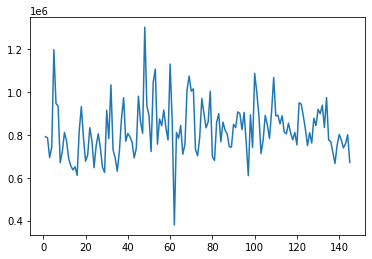

In [46]:
plt.plot(final_food.groupby('week').sum()['num_orders'])

In [47]:
final_food[final_food['id']==1343872]

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
4,1343872,5,55,1885,146.5,147.5,0,0,215,Beverages,Thai,647,56,TYPE_C,2.0


In [48]:
final_food[(final_food['week']==1) & (final_food.center_id == 55)].num_orders.sum()

8382

In [49]:
final_food.center_id.value_counts()

13     7046
10     7015
52     6993
43     6970
67     6915
       ... 
139    4627
57     4501
162    4366
41     4083
91     3432
Name: center_id, Length: 77, dtype: int64

In [57]:
test = pd.read_csv('test_QoiMO9B.csv')
test.shape

(32573, 8)

In [51]:
food_raw.head() # going to try to predict the no of orders

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [52]:
def con_2_cat(df):
    for label,content in df.items():
        if pd.api.types.is_string_dtype(content):
            df[label] = content.astype('category').cat.as_ordered()
con_2_cat(final_food)

In [53]:
final_food.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456548 entries, 0 to 456547
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   id                     456548 non-null  int64   
 1   week                   456548 non-null  int64   
 2   center_id              456548 non-null  int64   
 3   meal_id                456548 non-null  int64   
 4   checkout_price         456548 non-null  float64 
 5   base_price             456548 non-null  float64 
 6   emailer_for_promotion  456548 non-null  int64   
 7   homepage_featured      456548 non-null  int64   
 8   num_orders             456548 non-null  int64   
 9   category               456548 non-null  category
 10  cuisine                456548 non-null  category
 11  city_code              456548 non-null  int64   
 12  region_code            456548 non-null  int64   
 13  center_type            456548 non-null  category
 14  op_area             

In [54]:
def numericalize(df,col,name):
    if not pd.api.types.is_numeric_dtype(col):
        df[name] = pd.Categorical(col).codes + 1 
for label,content in final_food.items():
    numericalize(final_food,content,label)
final_food.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456548 entries, 0 to 456547
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
 9   category               456548 non-null  int8   
 10  cuisine                456548 non-null  int8   
 11  city_code              456548 non-null  int64  
 12  region_code            456548 non-null  int64  
 13  center_type            456548 non-null  int8   
 14  op_area                456548 non-nu

In [136]:
just = pd.DataFrame(final_food.groupby(['center_id','meal_id','emailer_for_promotion','week']).mean())

#just.center_id.transform(lambda s : s.loc[s.first_valid_index()])

In [141]:
just.reset_index(inplace = True)

In [142]:
from sklearn.preprocessing import StandardScaler
scaler1 = StandardScaler()

df_sc1 = scaler1.fit_transform(just.drop(['num_orders','base_price'],axis = 1))
y1 = np.log(just.num_orders)

In [155]:
n_valid = 120000
n_trn = len(final_food)-n_valid
#raw_train, raw_valid = split_val(df_sc1, n_trn)
X_train, X_valid = split_val(df_sc1, n_trn)
y_train, y_valid = split_val(y1, n_trn)
X_train.shape, y_train.shape, X_valid.shape

((336548, 13), (336548,), (120000, 13))

In [144]:
m1 = RandomForestRegressor(n_estimators = 40, n_jobs=1,oob_score = True)
%time m1.fit(X_train, y_train)
print_score(m)

Wall time: 1min 24s
[0.03754235715803932, 0.12756774977644153, 0.9771258763391135, 0.6759105123580507, 0.8372282297763912]


In [158]:
m1 = RandomForestRegressor(n_estimators = 40,min_samples_leaf = 3,max_features = 0.5, n_jobs=1,oob_score = True)
%time m1.fit(X_train, y_train)
print_score(m1)

Wall time: 37.1 s
[0.06587935027661024, 0.11871009531522175, 0.928187030290928, 0.7258099561351972, 0.8459810670387024]


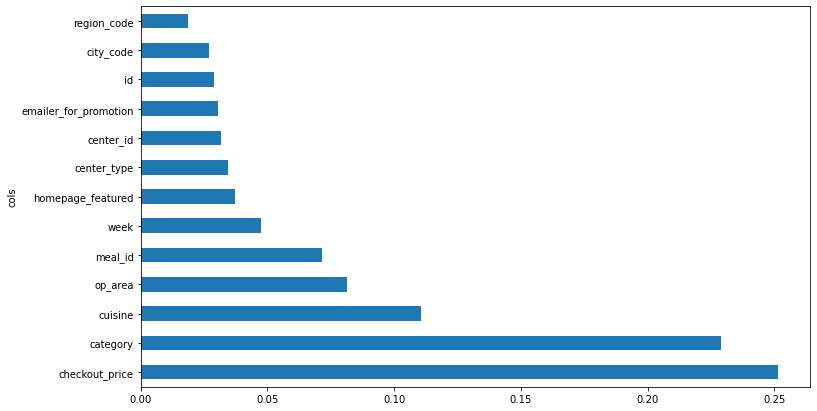

In [159]:
imp_cols_just =  rf_feat_importance(m1,final_food.drop(['num_orders','base_price'],axis =1))
imp_cols.plot('cols','imp','barh',figsize=(12,7),legend = False)
plt.show()

In [116]:
#from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_sc = scaler.fit_transform(final_food.drop(['num_orders','base_price'],axis = 1))
y = np.log(final_food.num_orders)

In [117]:
from sklearn.ensemble import RandomForestRegressor
m = RandomForestRegressor(n_jobs = 1)
m.fit(df_sc,y)
m.score(df_sc,y)

0.9783495575242624

In [146]:
def split_val(a,n): return a[:n].copy(),a[n:].copy()
n_valid = 120000
n_trn = len(final_food)-n_valid
raw_train, raw_valid = split_val(df_sc, n_trn)
X_train, X_valid = split_val(df_sc, n_trn)
y_train, y_valid = split_val(y, n_trn)
X_train.shape, y_train.shape, X_valid.shape


((336548, 13), (336548,), (120000, 13))

In [73]:
np.log1p(2)

1.0986122886681098

In [119]:
import math
def rmse(x,y): return np.sqrt(np.mean((np.log1p(x) - np.log1p(y))**2))

def print_score(m):
    res = [rmse(m.predict(X_train), y_train),
           rmse(m.predict(X_valid), y_valid),
           m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

m = RandomForestRegressor(n_jobs=1)
%time m.fit(X_train, y_train)
print_score(m)

Wall time: 3min 21s
[0.03667456311596562, 0.1293818416520781, 0.9779586747435709, 0.6838091430346204]


In [75]:
m = RandomForestRegressor(n_estimators = 40, n_jobs=1,oob_score = True)
%time m.fit(X_train, y_train)
print_score(m)

Wall time: 1min 23s
[0.0376120547515135, 0.12783201875345349, 0.976658689685035, 0.6942296997071883, 0.8333342186870274]


In [160]:
m = RandomForestRegressor(n_estimators = 100,min_samples_leaf = 3,max_features = 0.5, n_jobs=1,oob_score = True)
%time m.fit(X_train, y_train)
print_score(m)

Wall time: 1min 42s
[0.06546181032273234, 0.11745014357197366, 0.9292379241033659, 0.7326074881240219, 0.8495830551974007]


In [153]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)
imp_cols =  rf_feat_importance(m,final_food.drop(['num_orders','base_price'],axis =1))

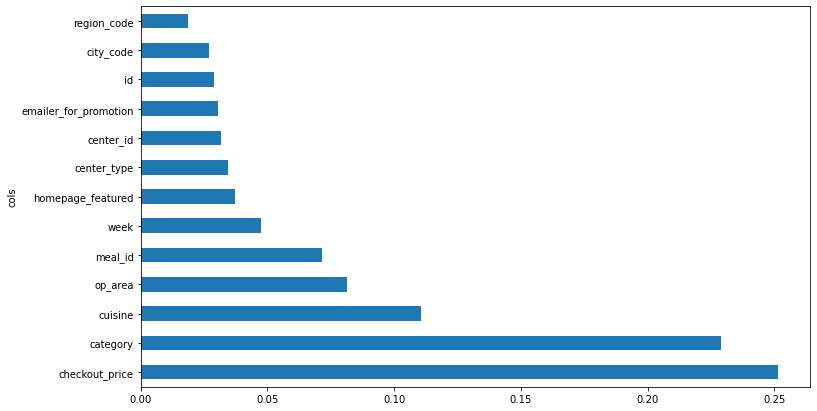

In [154]:
imp_cols.plot('cols','imp','barh',figsize=(12,7),legend = False)
plt.show()

In [81]:
X_valid[0],np.exp(m.predict(X_valid))

(array([-0.31422127,  0.89659985, -1.13335076, -0.49383892, -0.58636846,
        -0.36279351, -0.29718656,  2.85613669,  1.0633631 ,  0.39750474,
         0.03696005, -0.03483682, -0.78708358, -0.53457708]),
 array([1143.11165576,  312.19332504,  371.44316374, ...,   61.0406166 ,
          59.41017285,   62.08986748]))

In [83]:
test0 = pd.merge(test,food_meal,on= 'meal_id')
test1 = pd.merge(test0,food_info, on = 'center_id')
test1

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,category,cuisine,city_code,region_code,center_type,op_area
0,1028232,146,55,1885,158.11,159.11,0,0,Beverages,Thai,647,56,TYPE_C,2.0
1,1262649,147,55,1885,159.11,159.11,0,0,Beverages,Thai,647,56,TYPE_C,2.0
2,1453211,149,55,1885,157.14,158.14,0,0,Beverages,Thai,647,56,TYPE_C,2.0
3,1262599,150,55,1885,159.14,157.14,0,0,Beverages,Thai,647,56,TYPE_C,2.0
4,1495848,151,55,1885,160.11,159.11,0,0,Beverages,Thai,647,56,TYPE_C,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32568,1412025,146,61,2104,583.03,581.03,0,0,Fish,Continental,473,77,TYPE_A,4.5
32569,1287019,147,61,2104,582.03,582.03,0,1,Fish,Continental,473,77,TYPE_A,4.5
32570,1396176,149,61,2104,629.53,629.53,0,0,Fish,Continental,473,77,TYPE_A,4.5
32571,1331977,150,61,2104,629.53,629.53,0,0,Fish,Continental,473,77,TYPE_A,4.5


In [85]:
con_2_cat(test1)
for label,content in test1.items():
    numericalize(test1,content,label)


In [100]:
test_sc = scaler.transform(test1)
test_dic={}
for i,j in zip(test1.id,np.exp(m.predict(test_sc))):
    test_dic[i] =j
test_dic

{1028232: 127.81773691558372,
 1262649: 119.21814608210528,
 1453211: 104.3444349310453,
 1262599: 119.21814608210528,
 1495848: 114.22671932516258,
 1342607: 117.02956760862116,
 1358429: 115.55116858786799,
 1475006: 112.75724628642682,
 1009709: 123.66784117310996,
 1127204: 132.78939812548424,
 1454285: 100.54571227088846,
 1230213: 116.99569908245674,
 1216199: 118.3582231967744,
 1338024: 114.8887590380895,
 1316220: 115.4312664297565,
 1261077: 116.99569908245674,
 1499021: 114.8334072027792,
 1384202: 104.77491701071689,
 1327954: 115.4312664297565,
 1212707: 134.98116667517095,
 1313597: 131.74863467483368,
 1412241: 122.02847856936958,
 1082698: 46.078805215455695,
 1308392: 76.76845818813885,
 1199853: 82.41020918232819,
 1022140: 82.11924069815504,
 1352470: 79.20415720342602,
 1189345: 51.26038050421435,
 1490265: 51.38025592145546,
 1348230: 51.252253315808325,
 1400926: 46.285970546086254,
 1383499: 43.39290192604576,
 1126038: 39.70797679921758,
 1286555: 48.45406698200

In [101]:
test_result = pd.DataFrame()
test_result['id'] = test1.id
test_result['num_orders'] = np.exp(m.predict(test_sc) )
test_result.head()
                                   

,id,num_orders
0,1028232,127.817737
1,1262649,119.218146
2,1453211,104.344435
3,1262599,119.218146
4,1495848,114.226719


In [108]:
test_result.shape

(32573, 2)

In [107]:
test_result.to_csv('out.csv')